In [2]:
from transformers import pipeline
from Comment_scrapper import youtube_scrapper

In [4]:
with youtube_scrapper(video_url="https://youtu.be/rq8cL2XMM5M") as scrapper:
    comments = scrapper.yt_comments()

Executing teardown


In [5]:
comments

['Summary:\nIn this video, Corey distinguishes between a regular method, class method, and a static method.',
 "I'm broke right now but your tutorials are helping pave the way for me to get out of this situation. Once I get back on my feet I'm going to send some loot to your patreon. Thank you for teaching. These are awesome tutorials.",
 'He actually knows what to teach, \nUnlike most of paid courses.',
 'When I was a beginner, I have watched this video and I learned a couple of things. Now that I have intermediate skills, I see the depth and beauty of this video clearly. I feel like I truly grasped this concept. Thanks Corey!',
 'Hi Corey,\n\nI noticed a small mistake at 5:46.\nWhen you split the string, you create new strings including the pay variable.',
 "Easily the best explanations of Python concepts on any platform ( YouTube, Udemy, Code with Mosh etc.) Corey has a great ability when explaining something to stay within the scope of the topic. By that i mean he doesn't mentioned

In [6]:
sentiment_analysis = pipeline("sentiment-analysis")
comment_analysis = sentiment_analysis(comments)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [7]:
comment_analysis

[{'label': 'POSITIVE', 'score': 0.9742497801780701},
 {'label': 'POSITIVE', 'score': 0.9997926354408264},
 {'label': 'POSITIVE', 'score': 0.9989521503448486},
 {'label': 'POSITIVE', 'score': 0.9997730851173401},
 {'label': 'NEGATIVE', 'score': 0.9974080920219421},
 {'label': 'POSITIVE', 'score': 0.9923507571220398},
 {'label': 'POSITIVE', 'score': 0.9997623562812805},
 {'label': 'POSITIVE', 'score': 0.9998472929000854},
 {'label': 'POSITIVE', 'score': 0.9840669631958008},
 {'label': 'POSITIVE', 'score': 0.9985918402671814},
 {'label': 'POSITIVE', 'score': 0.9957096576690674},
 {'label': 'POSITIVE', 'score': 0.9993853569030762},
 {'label': 'POSITIVE', 'score': 0.9998433589935303},
 {'label': 'POSITIVE', 'score': 0.9993847608566284},
 {'label': 'POSITIVE', 'score': 0.9997301697731018},
 {'label': 'POSITIVE', 'score': 0.9997785687446594},
 {'label': 'POSITIVE', 'score': 0.9987428784370422},
 {'label': 'POSITIVE', 'score': 0.9998158812522888},
 {'label': 'POSITIVE', 'score': 0.999000489711

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame.from_dict(comment_analysis)

In [10]:
df

,label,score
0,POSITIVE,0.974250
1,POSITIVE,0.999793
2,POSITIVE,0.998952
3,POSITIVE,0.999773
4,NEGATIVE,0.997408
5,POSITIVE,0.992351
6,POSITIVE,0.999762
7,POSITIVE,0.999847
8,POSITIVE,0.984067
9,POSITIVE,0.998592


In [11]:
comments = pd.Series(comments)

In [12]:
df["comments"]=comments

In [14]:
df.head()

,label,score,comments
0,POSITIVE,0.974250,"Summary:\nIn this video, Corey distinguishes b..."
1,POSITIVE,0.999793,I'm broke right now but your tutorials are hel...
2,POSITIVE,0.998952,"He actually knows what to teach, \nUnlike most..."
3,POSITIVE,0.999773,"When I was a beginner, I have watched this vid..."
4,NEGATIVE,0.997408,"Hi Corey,\n\nI noticed a small mistake at 5:46..."


In [24]:
(df["label"]=="POSITIVE").value_counts()

True     19
False     1
Name: label, dtype: int64

In [25]:
pos,neg=(df["label"]=="POSITIVE").value_counts()

In [27]:
labels=["positive","negative"]
number=[pos,neg]

In [28]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

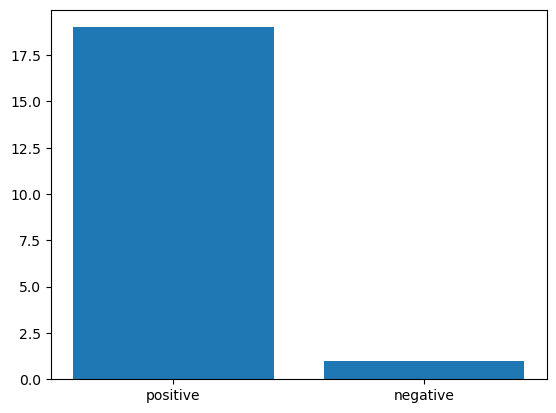

In [39]:
plt.bar(labels,number)